# 中央極限定理 (Central Limit Theorem)
[seeing theory](https://seeing-theory.brown.edu/probability-distributions/cn.html#section3)

### 常態分佈 :
$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$  
***
### 標準常態分布 / Z分布 (standard normal distribution)
將任一常態分布經過Z轉換後所得之分佈(仍為常態分布)。
即取平均數為 0 與標準差為 1 之常態分佈,  
標準常態分布可用Z ~ N($\mu$=0,$\sigma$=1)表示  

簡單來說Z轉換是將常態分佈作平移跟伸縮到$\mu=0$,$\sigma=1$的Z分佈  
$Z = \frac{X-\mu}{\sigma}$
 
$f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$  
***

### 中央極限定理 (Central Limit Theorem)
- 從一個母體以簡單隨機抽樣法抽出n個樣本,當n很大(有限次數)時,其樣本平均數$\overline{X}$的抽樣分佈(無限次取樣), 經過標準化 Z=$\frac{\overline{X}-\mu}{\sigma / \sqrt{n}} $  
它分佈會趨近標準常態分佈  

### 樣本平均數$\overline{X}$
指的是抽出n個樣本的平均數, 以$\overline{X}$表示  
$\overline{X} = \frac{1}{n}\sum_{i=1}^nX_i$  

### 特性
1. 樣本平均數$\overline{X}$的抽樣分佈呈常態分佈
1. 樣本平均數$\overline{X}$的抽樣分佈其平均數為母體的平均數
1. 樣本平均數$\overline{X}$的標準差$\sigma_\overline{X}= \frac{母體的標準差 \sigma}{\sqrt{n}}$  
可以看出n增加$\sigma_\overline{X}$會趨近0
*** 
當樣本大小大於30時成立  
二項式分佈則是np>5


In [3]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
%matplotlib inline

## 應用CLT算機率

假設某考試中, 考生通過標準機率為0.7, 以隨機變數X表示(X=1表示通過),(X=0表示不通過),其機率分配為P(X=1)=0.7, P(X=0)=0.3  
1. 計算母體平均數跟變異數 (0.7,0.21)
1. 假設有210名考生, 計算平均通過率的平均數跟變異數
1. 計算通過人數大於126的機率

### 1) 計算母體平均數跟變異數
n=1, p=0.7  
二項分佈  
$\mu=np = 0.7$  
$\sigma^2=Var(X)=np(1-p)=1*0.7*0.3=0.21$

### 2) 假設有210名考生, 計算平均通過率的平均數跟變異數
假設有210名考生  
n=1, p=0.7   
令  
$X_i = 1$表示 pass  
$X_i = 0$表示 fail  
樣本平均數$\overline{X}_{210}$ = $\frac{X_1+....X_{210}}{210}$  
其樣本平均數抽樣分佈的平均數$\mu_\overline{X}$ = $\mu$ = 0.7  
$\sigma_\overline{X}^2$ = $\frac{\sigma^2}{210}$ = 0.21 / 210 = 0.001  

### 3) 計算通過人數大於126的機率 
$P(X_1+...+X_{210} \geq 126)$ 
同除210
$P(\frac{X_1+...+X_{210}}{210} \geq \frac{126}{210})$ 


已知
樣本平均數$\overline{X}_{210}$ = $\frac{X_1+....X_{210}}{210}$  
= $P(\overline{X}_{210} \geq 0.6)$  
即計算樣本平均數大於0.6的機率  
對Z轉換而言, Z=$\frac{\overline{X}-\mu}{\sigma / \sqrt{n}} $
即$\overline{X}= \sigma / \sqrt{n}*Z+\mu$
原式  
= $P(\sigma / \sqrt{n}*Z+\mu \geq 0.6)$   
= $P(Z \geq \frac{0.6-\mu}{\sigma/\sqrt{n}})$  
= $P(Z \geq \frac{0.6-0.7}{\sqrt{0.001}})$  
= $P(Z \geq -3.16228)$  
因為Z分佈是對稱的, 所以$P(Z \geq -3.16228)$ = $P(Z < 3.16228)$ = 0.99921

1) 母體$\mu=np=1*0.7=0.7$  
$\sigma^2=np(1-p)=0.7*0.3=0.21$  
2) 令隨機變數$X_1,....X_{210}$  
$X_i=1 pass$  
$X_i=0 fail$  
$X_{210}bar = \frac{X_1+X_2..X_{210}}{210}$  
$\mu_X = \mu = 0.7$  
$\sigma_X^2 = \frac{\sigma^2}{210} = 0.001 $

In [6]:
# 應用 CLT 計算通過人數 > 126 的機率
z = (126./210. - 0.7) / np.sqrt(0.001)
print("通過人數 >126 的機率：{0:0.6f}".format(1 - stats.norm.cdf(z, loc = 0, scale = 1)))

通過人數 >126 的機率：0.999217


***
### n位考生計算通過人數大於m的機率 
$P(X_1+...+X_{n} \geq m)$  
其實可視為 $P(\frac{X_1+...+X_{n}}{n} \geq \frac{m}{n})$  
= $P(Z \geq \frac{\overline{X}-\mu}{\sigma/\sqrt{n}})$  
其中  
$\overline{X}_{n}$ = $\frac{X_1+....X_{n}}{n}$  

***


In [7]:
#  請應用CLT計算「考生及格人數大於某數量的機率」之副程式 CLT_passprob：
def CLT_passprob(x, n, p, digit):
    # 樣本平均數 xbar： 其中xi通過=1, 不通過=0, 通過x人 ---> X1+...Xn = x
    xbar = x / n
    # 理論上的母體平均數 mu 與變異數 sigma2：
    mu = p
    #np(1-p), n=1
    sigma2 = p*(1-p)
    
    # 樣本的平均數 xbar.mu 與變異數 xbar.sigma2：
    xbar_mu = mu
    xbar_sigma2 = sigma2/n
    
     # 標準化 Z-Score：
    z = (xbar - xbar_mu)/np.sqrt(xbar_sigma2)
    #小數點下6位
    zvalue = round(z, digit)
    # Z ~ N(0, 1)，計算 P(Z > zvalue) = right_prob：
    #因為標準常態分佈對稱, P(Z > ...) = 1-P(Z < ...)
    right_prob = 1 - stats.norm.cdf(z, loc = 0, scale = 1)
    
    return {"zvalue": zvalue, "CLT_prob": right_prob}
# digit for round Z
CLT_passprob(x = 126, n = 210, p = 0.7, digit = 6)

{'zvalue': -3.162278, 'CLT_prob': 0.9992172988709987}

生出女兒，或生了3個孩子就停止，請計算有女兒的機率：  
生出女孩的機率 0.49，生出男孩 0.51  
女孩：0-48 / 男孩：49-99  

### 1) 計算母體平均數跟變異數
令隨機變數X=1表示生出女生, X=0表示生出男生
Pr(X=1) = 0.49  
Pr(X=0) = 0.51  

In [25]:
def girl_burn(n=1):
    girl_count=0
    for i in range(n):
        count=0
        while True:
            rnd = np.random.randint(100)
            print("({})".format(rnd), end="")
            # numpy.where(condition[, x, y]), x
            is_girl = np.where(rnd <= 48, True, False)
            count += 1
            if (is_girl):
                girl_count += 1
                print("女+", end="")
                break
            elif (count == 3):
                print("男".format(rnd), end="")
                break
            else:
                print("男".format(rnd), end="")
        #it is girl
        print("\n" )
    p = girl_count / n
    print("%f\n" % p)
        
girl_burn(10)

(82)男(20)女+

(50)男(15)女+

(50)男(8)女+

(90)男(2)女+

(88)男(34)女+

(18)女+

(4)女+

(1)女+

(18)女+

(23)女+

1.000000



### CTL 驗證


(10, 500)


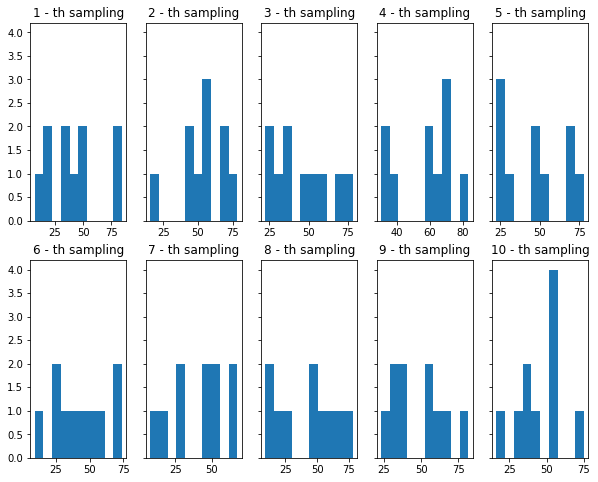

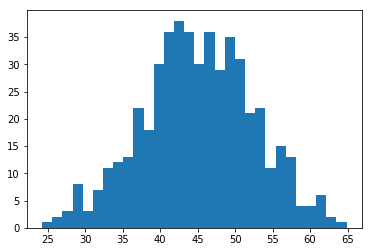

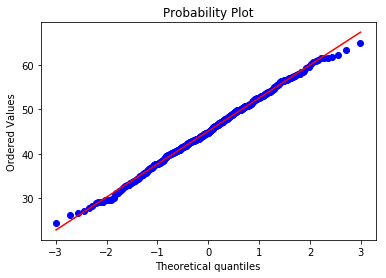

In [41]:
import numpy as np 
import pylab 
import scipy.stats as stats
# Xi ~ U(umin, umax)，觀察樣本平均數的抽樣分配
# 重複不同的樣本數，當樣本數 n.sample 越大，樣本平均數的抽樣分配越趨近於 CLT 的結論：

def CLT_unif(umin, umax, n_sample, n_repeated):
    fig, axs = plt.subplots(math.ceil(n_sample/5), 5, squeeze=False, sharey=True, figsize=(10,4*math.ceil(n_sample/5)))
    # 請生成零矩陣（Zero Matrix），維度 n.sample * n.repeated：
    RandomSample = np.zeros((n_sample, n_repeated))
    # 每次抽樣 n.sample 個樣本，並將此過程重複操作 n.repeated 次：
    for i in range(n_repeated):
        # X_1, X_2, ...., X_n.sample ~ U(umin, umax)：rnumber is a vector
        # uniform.rvs(loc=0, scale=1, size=1, random_state=None)
        rnumber = stats.uniform.rvs(umin, umax, size = n_sample)
        # 將每次抽樣結果 rnumber 存入樣本矩陣 RandomSample 的每一行(column)：
        RandomSample[:, i] = rnumber
    print(RandomSample.shape)
    # 以直方圖(Histogram)觀察每次抽樣的分配結果：
    # 重複觀察抽樣分配結果 min(n.repeated, n.smaple) 次
    for i in range(min(n_repeated, n_sample)):
        title = str(i+1) + " - th sampling"
        axs[i//5, i%5].set_title(title)
        axs[i//5, i%5].hist(RandomSample[:, i], label = title)
    plt.show()
    #
    # 請計算每一行的樣本平均值(column mean of sample)：
    # 將每次抽樣的分配結果各自計算平均，並依序儲存於抽樣平均值向量 SampleMean
    # Hint: 計算 RandomSample 每一行(column)的平均值
    SampleMean = RandomSample.mean(axis = 0) 
    #print(SampleMean.shape)
    plt.hist(SampleMean, bins=30)
    plt.show()
    # qqnorm
    stats.probplot(SampleMean, dist="norm", plot=pylab)
    pylab.show()
  
    #pylab.show()
    
CLT_unif(5, 80, 10, 500)